In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [86]:
#Daily max wind gusts
dmax_2p2km_point = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_aws_dmax_2p2km.csv")
dmax_2p2km_interp = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_aws_dmax_2p2km_barpa_r_interp.csv")
dmax_12km_point = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_aws_dmax_12km.csv")
dmax_erai = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_aws_dmax_erai.csv")

dmax_obs = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_aws_dmax_obs.csv")
dmax_obs = dmax_obs.set_index(pd.to_datetime(dmax_obs.time))
obs_times = pd.to_datetime(dmax_obs.time)
dmax_obs.loc[(obs_times.dt.month == 12) & (obs_times.dt.year == 2010) & (dmax_obs.stn_id==55325) & (dmax_obs.gust >= 25),"gust"] = np.nan
dmax_obs.loc[dmax_obs.gust>=129, "gust"] = np.nan 

In [56]:
#Daily domain maximum gusts
ddmax_2p2km_all = dmax_2p2km_point.sort_values("wg10_2p2km_point").drop_duplicates("dt_floor_1D",keep="last").sort_index()
ddmax_obs_all = dmax_obs.dropna(subset=["gust"]).sort_values("gust").drop_duplicates("dt_floor_1D",keep="last").sort_index()

In [75]:
#All 10 min gusts

states=["vic","nsw","sa","tas"]

df_obs = pd.DataFrame()
df_barpac = pd.DataFrame()
for state in tqdm.tqdm(states):
    
    #Read 10-minute data for each state
    df = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_aws_"+state+".csv").\
        dropna(subset="gust").\
        drop(columns=["time"]).\
        rename(columns={"Unnamed: 1":"time"})
    df = df.set_index(pd.to_datetime(df["time"]))
    
    df_obs = pd.concat([df_obs,df[["stn_id","gust"]]],axis=0)
    df_barpac = pd.concat([df_barpac,df[["stn_id",'wg10_2p2km_point']]],axis=0)    
    
df_obs.loc[(df_obs.index.month == 12) & (df_obs.index.year == 2010) & (df_obs.stn_id==55325) & (df_obs.gust >= 25),"gust"] = np.nan
df_obs.loc[df_obs.gust>=129, "gust"] = np.nan     

100%|██████████| 4/4 [01:58<00:00, 29.69s/it]


Text(0.5, 1.0, '10-minute QQ plot')

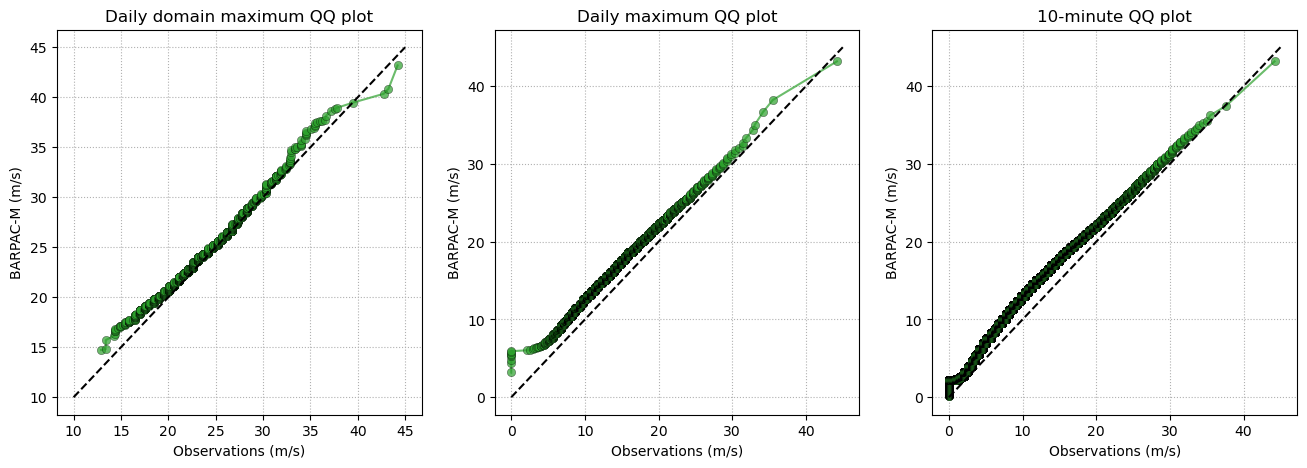

In [85]:
plt.figure(figsize=[16,5])


plt.subplot(1,3,1)
values_2p2km = ddmax_2p2km_all["wg10_2p2km_point"].values
values_obs = ddmax_obs_all["gust"].values
p=1000
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:green")
plt.plot([10,45],[10,45],color="k",ls="--")
plt.gca().grid(ls=":")
plt.ylabel("BARPAC-M (m/s)")
plt.xlabel("Observations (m/s)")
plt.title("Daily domain maximum QQ plot")


plt.subplot(1,3,2)
values_2p2km = dmax_2p2km_point["wg10_2p2km_point"].dropna().values
values_obs = dmax_obs["gust"].dropna().values
p=10000
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:green")
plt.plot([0,45],[0,45],color="k",ls="--")
plt.gca().grid(ls=":")
plt.ylabel("BARPAC-M (m/s)")
plt.xlabel("Observations (m/s)")
plt.title("Daily maximum QQ plot")

plt.subplot(1,3,3)
values_2p2km = df_barpac["wg10_2p2km_point"].dropna().values
values_obs = df_obs["gust"].dropna().values
p=int(1e6)
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:green")
plt.plot([0,45],[0,45],color="k",ls="--")
plt.gca().grid(ls=":")
plt.ylabel("BARPAC-M (m/s)")
plt.xlabel("Observations (m/s)")
plt.title("10-minute QQ plot")

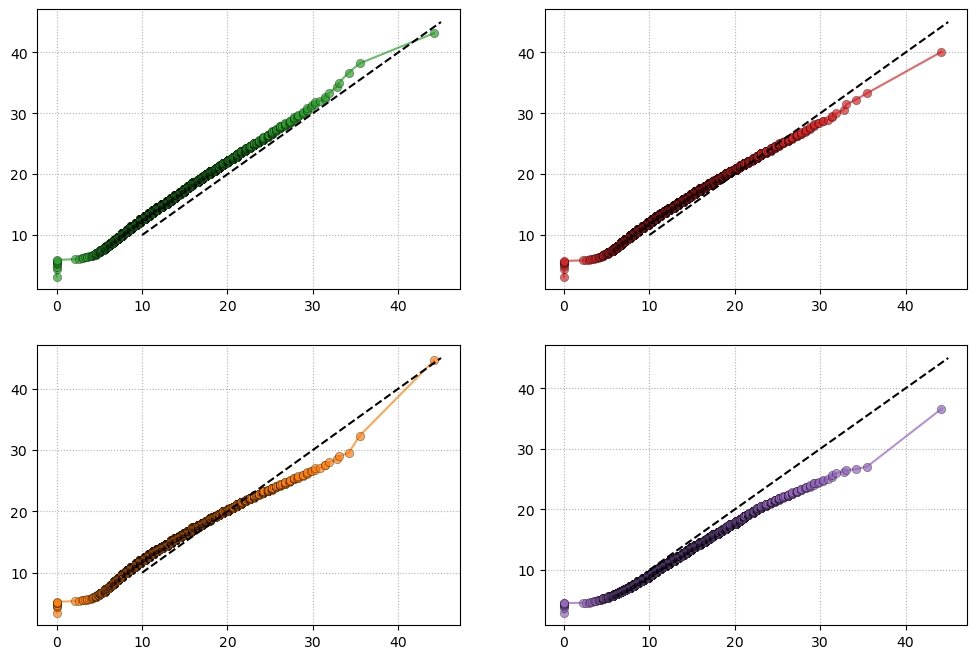

In [99]:
plt.figure(figsize=[12,8])

plt.subplot(2,2,1)
values_2p2km = dmax_2p2km_point["wg10_2p2km_point"].dropna().values
values_obs = dmax_obs["gust"].dropna().values
p=10000
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:green")
plt.plot([10,45],[10,45],color="k",ls="--")
plt.gca().grid(ls=":")

plt.subplot(2,2,2)
values_2p2km = dmax_2p2km_interp["wg10_2p2km_point"].dropna().values
p=10000
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:red")
plt.plot([10,45],[10,45],color="k",ls="--")
plt.gca().grid(ls=":")

plt.subplot(2,2,3)
values_2p2km = dmax_12km_point["wg10_12km_point"].dropna().values
p=10000
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:orange")
plt.plot([10,45],[10,45],color="k",ls="--")
plt.gca().grid(ls=":")

plt.subplot(2,2,4)
values_2p2km = dmax_erai["erai_wg10"].dropna().values
p=10000
plt.plot(np.percentile(values_obs,np.linspace(0,100,p)),np.percentile(values_2p2km,np.linspace(0,100,p)),ls="-",marker="o",mec="k",mew=0.3,alpha=0.7,color="tab:purple")
plt.plot([10,45],[10,45],color="k",ls="--")
plt.gca().grid(ls=":")